# Set up

- import necessary library

In [2]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

- gathering dataset

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df = df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data preprocessing

- Handling missing value by fill missing value with the mean of this column

In [4]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


- Data encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


- Oversampling the dataset (with SMOTE)

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']

In [8]:
y = df['stroke']
X = df[features]

In [9]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

- Dividing the collected dataset into training dataset and testing one

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(7777, 10) (1945, 10) (7777,) (1945,)


# Model training

Grid Search

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth' : [25,26,27,28,29,30,31,32,33,34,35],
    'max_features' : ['sqrt','log2'],
    'max_leaf_nodes' : [1050,1100,1150,1200,1250,1300,1350,1400,1450],
    'criterion':['gini', 'entropy',' log_loss']
    
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'max_leaf_nodes': 1450}


In [13]:
model = DecisionTreeClassifier(max_features = "sqrt",max_depth=32,max_leaf_nodes=140,criterion="entropy")

In [14]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=32, max_features='sqrt',
                       max_leaf_nodes=1400)

# Decision tree visualization

In [15]:
from sklearn import tree
print(tree.export_text(model))

|--- feature_7 <= 161.63
|   |--- feature_9 <= 2.50
|   |   |--- feature_8 <= 21.40
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- feature_1 <= 76.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  76.50
|   |   |   |   |   |--- feature_8 <= 19.65
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_8 >  19.65
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.50
|   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |--- feature_1 <= 77.05
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  77.05
|   |   |   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_5 <= 2.50
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 78.07
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |-

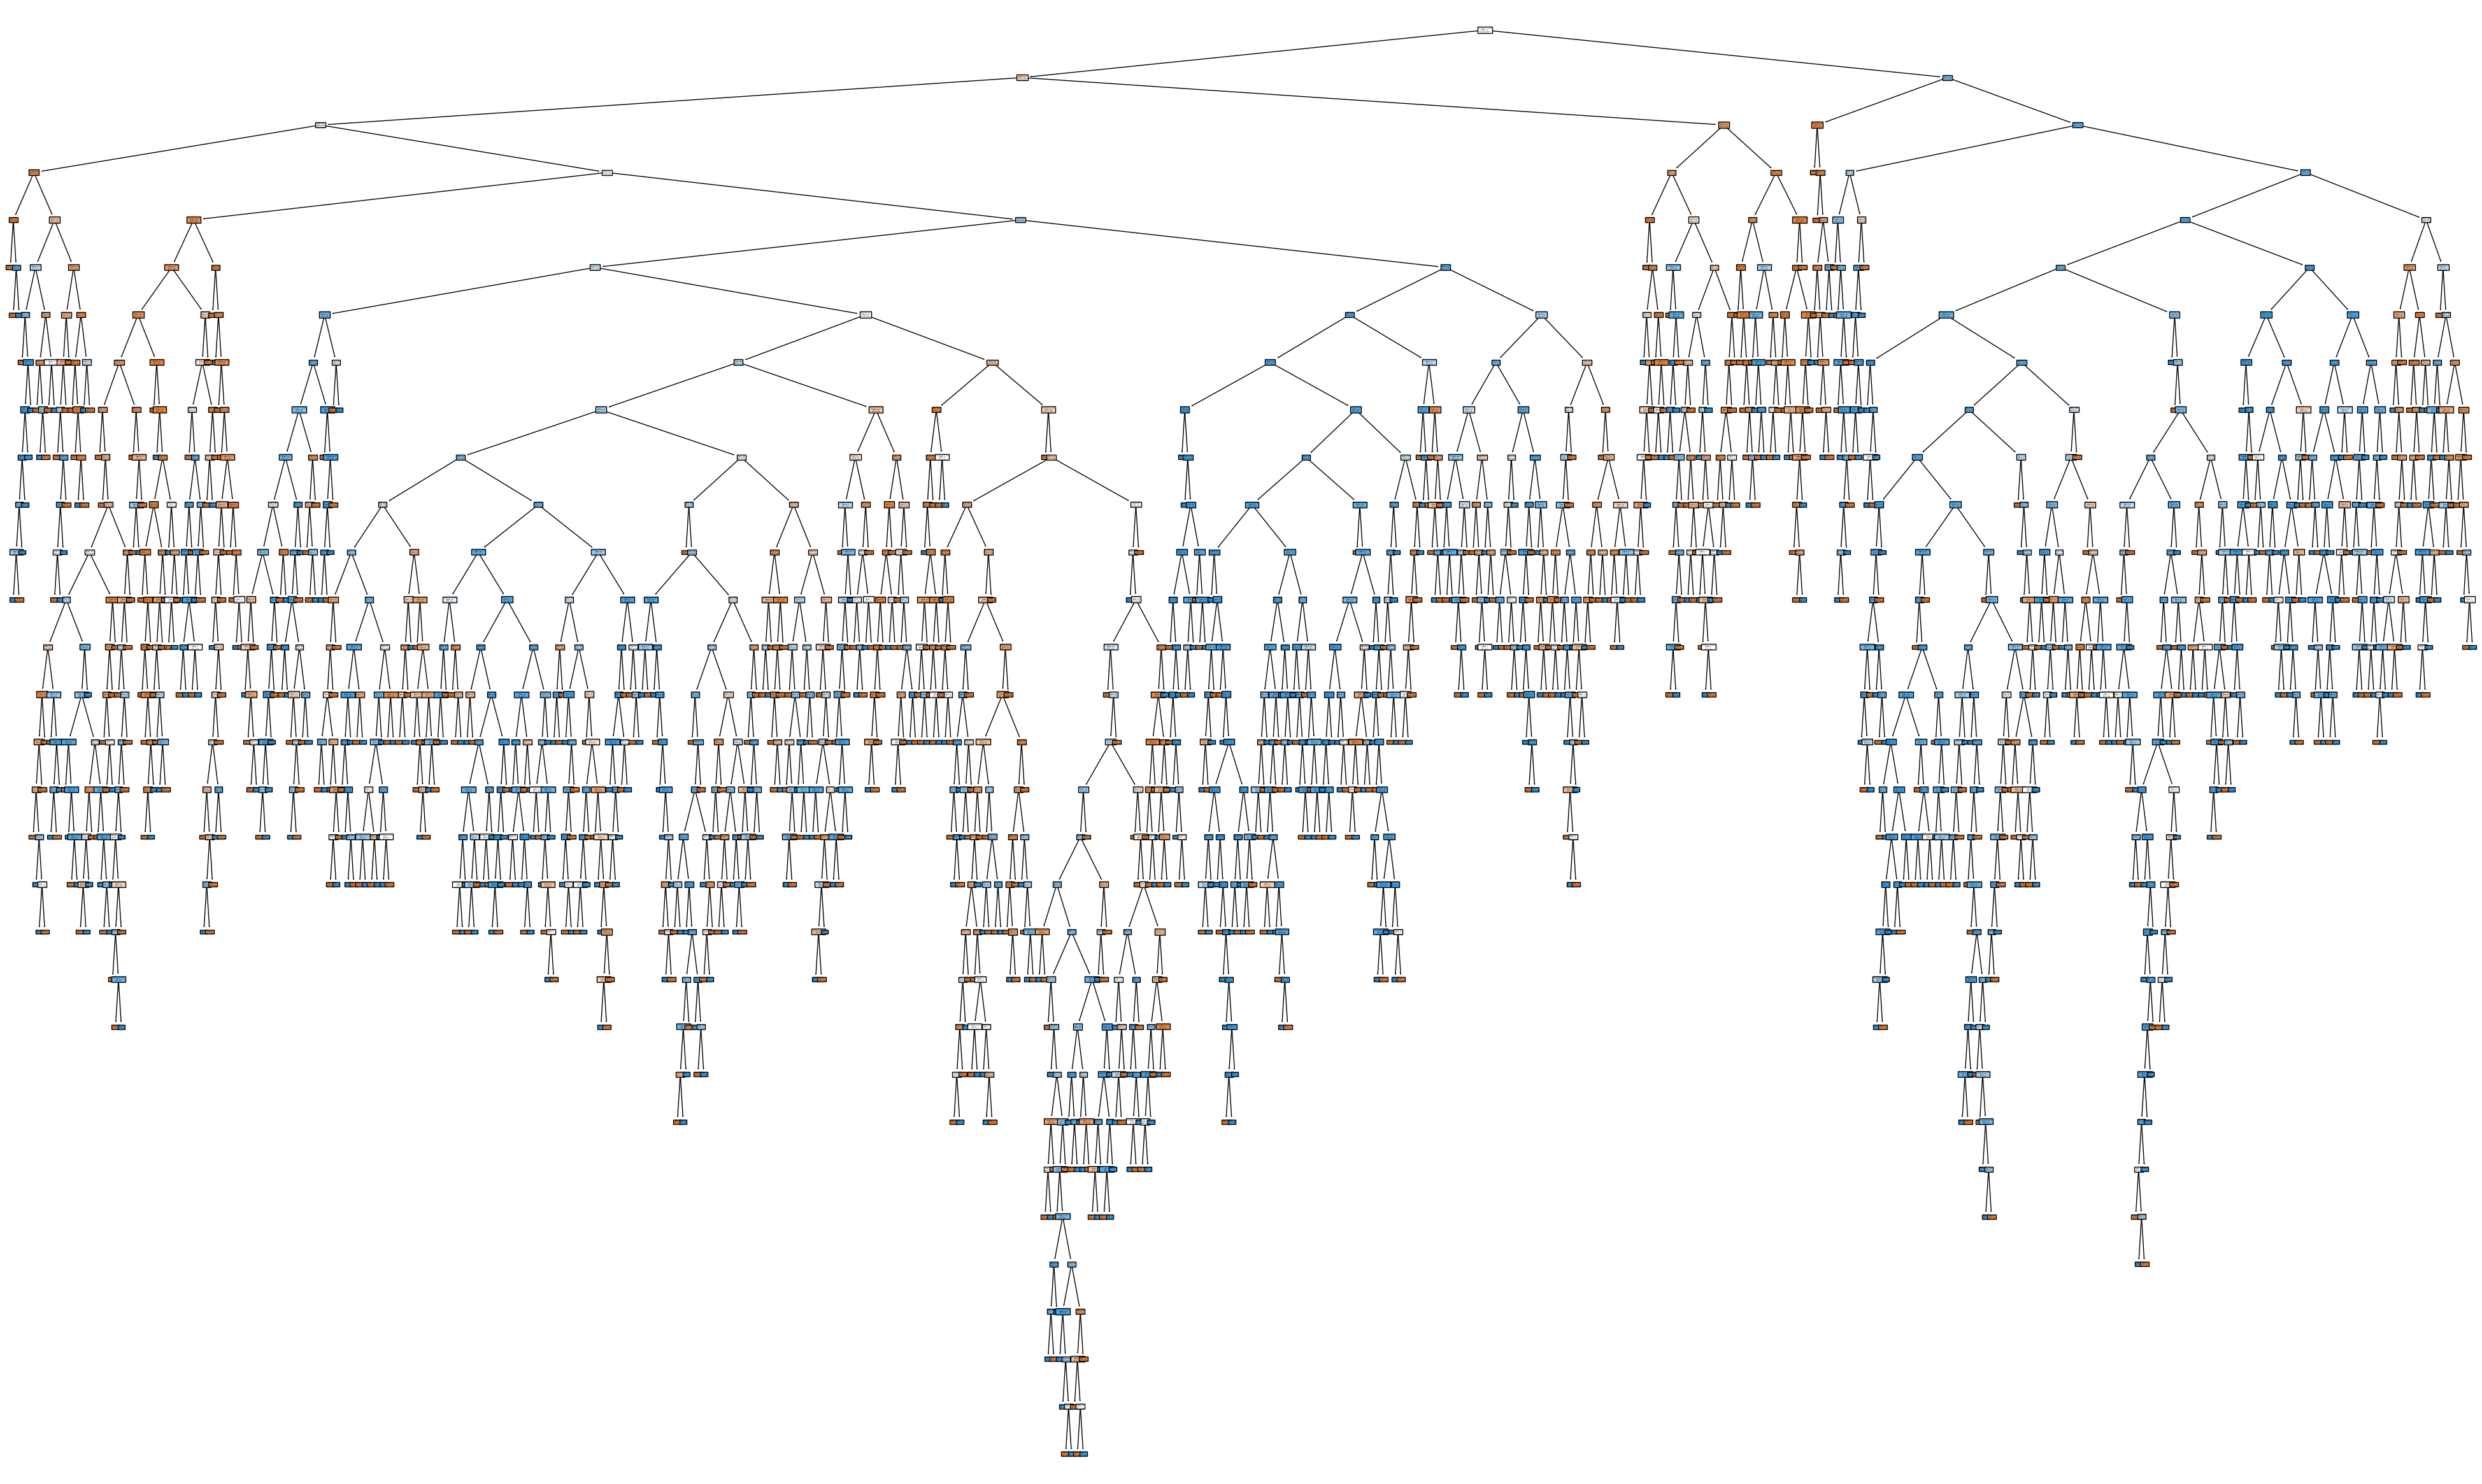

In [16]:
import matplotlib.pyplot as plt
fig  = plt.figure(figsize=(50,30))
_ = tree.plot_tree(model, feature_names=features,class_names=["No Stroke", "Stroke"], filled= True)

# Model evaluation

In [17]:
print("Training accuracy on Decision Tree: ", model.score(X_train, y_train)*100)

Training accuracy on Decision Tree:  100.0


In [18]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

cm = confusion_matrix(y_test, model.predict(X_test))      
accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
print("Confusion Matrix: \n", cm)
print("Model testing accuracy:", ((cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]))*100, "%", sep=' ')
print(f'K-Fold Validation Mean Accuracy: {accuracies.mean()*100:.2f}%')
print(f'Precision Score: {precision_score(y_test, model.predict(X_test))*100:.2f}%')
print(f'Recall Score: {recall_score(y_test, model.predict(X_test))*100:.2f}%')
print(f'F1 Score: {f1_score(y_test, model.predict(X_test))*100:.2f}%')
print()


Confusion Matrix: 
 [[865 103]
 [ 70 907]]
Model testing accuracy: 91.10539845758355 %
K-Fold Validation Mean Accuracy: 89.29%
Precision Score: 89.80%
Recall Score: 92.84%
F1 Score: 91.29%

